In [1]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hf = h5py.File('/media/maria/DATA1/Documents/ZebraFish/subject_1/TimeSeries.h5', 'r')
#print(hf['absIx'])
neural_dat=np.array(hf['CellResp'])
del hf

regressors=loadmat('/media/maria/DATA1/Documents/ZebraFish/subject_1/data_full.mat')
cell_pos=regressors['data']['CellXYZ'][0][0]
missing_values=regressors['data']['IX_inval_anat'][0][0]
cell_pos=np.delete(cell_pos,missing_values,axis=0)

In [4]:
mean_act=np.mean(neural_dat,axis=1)

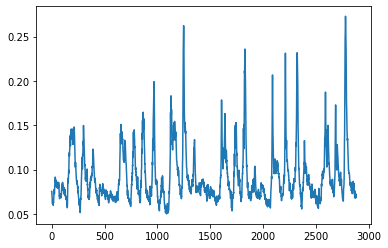

In [8]:
plt.plot(mean_act)

(array([   66.,   272.,  1091.,  5358., 22795., 18543., 12893., 10373.,
         7966.,  3848.]),
 array([-0.691969  , -0.52989165, -0.3678143 , -0.20573694, -0.04365959,
         0.11841777,  0.28049512,  0.44257248,  0.60464983,  0.76672718,
         0.92880454]),
 <a list of 10 Patch objects>)

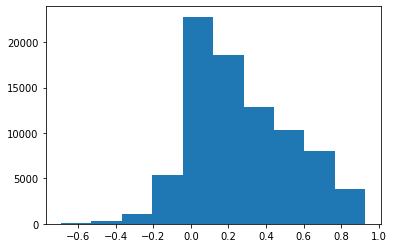

In [7]:
corr_lst=[]
for j in range(0,83205):
    corr_lst.append(np.corrcoef(mean_act,neural_dat[:,j])[0,1])
plt.hist(corr_lst)

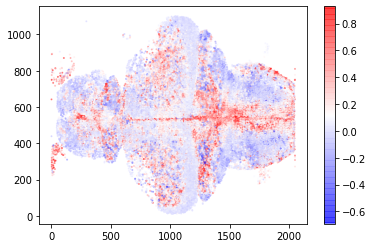

In [13]:
plt.scatter(cell_pos[:,0], cell_pos[:,1], s = 1, c = corr_lst, cmap='bwr', alpha = .5)
plt.colorbar()